In [2]:
!pip install lightgbm pandas numpy matplotlib seaborn scikit-learn xgboost tensorflow


     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------  1.0/1.0 MB 32.7 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 21.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
      --------------------------------------- 1.6/70.9 MB 34.9 MB/s eta 0:00:02
     - -------------------------------------- 3.4/70.9 MB 43.6 MB/s eta 0:00:02
     --- ------------------------------------ 5.4/70.9 MB 43.0 MB/s eta 0:00:02
     ---- ----------------------------------- 7.5/70.9 MB 43.8 MB/s eta 0:00:02
     ----- ---------------------------------- 9.6/70.9 MB 43.9 MB/s eta 0:00:02
     ------ -------------------------------- 11.2/70.9 MB 40.9 MB/s eta 0:00:02
     ------- ------------------------------- 13.5/70.9 MB 43.7 MB/s eta 0:00:02
     -------- ------------------------------ 15.9/70.9 MB 46.7 MB/s eta 0:00:02
     ---------- ---------------------------- 18.5/70.9 MB 4

In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import sys
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
pd.set_option('display.max_rows', 100,'display.max_columns', 1000,"display.max_colwidth",1000,'display.width',1000)
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.neural_network import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import *
from math import sqrt

In [6]:
data = pd.read_excel(r'F:\2023\7002\data v1\final_data.xlsx')

In [7]:
data.shape

(93738, 190)

In [ ]:
data.head()

,selling price,new car price,driven distance,Displacement (L),Maximum speed(km/h),Official 0-100km/h acceleration (s),Ministry of Industry and Information Technology's comprehensive fuel consumption (L/100km),Length (mm),Width (mm),height (mm),Wheelbase (mm),Front track(mm),Rear track(mm),Number of doors,number of seats,Fuel tank capacity (L),Luggage compartment volume (L),curb weight(kg),Minimum ground clearance (mm),Displacement (mL),Number of cylinders (pieces),Number of valves per cylinder (pieces),compression ratio,Maximum horsepower (Ps),Maximum power (kW),Maximum power speed(rpm),Maximum torque (N·m),Maximum torque speed(rpm),front side airbag,keyless start system,TRC traction control system,uphill assistance,Electric sunroof,leather steering wheel,daytime running lights,automatic headlights,mirror heating,rear wiper,Rear seat air outlet,transfer record,4S shop maintenance,Original car purchase/transfer invoice,Vehicle purchase tax payment certificate,passenger/person,Commercial insurance expiration date difference (days),Compulsory traffic insurance expiration date difference (days),Registration date difference (days),Factory date difference (days),Vehicle and vessel tax expiration date difference (days),Intake form_Twin turbo,Air intake form_none,Air intake form_mechanical + turbocharged,Air intake form_supercharger,Air intake form_Turbo boost,Air intake form_naturally aspirated,Cylinder arrangement_H,Cylinder arrangement_L,Cylinder arrangement_V,Cylinder arrangement_W,Cylinder arrangement_none,Valve Train_DOHC,Valve Train_OHV,Valve Train_SOHC,Valve train_none,Valve Train_Unknown,Fuel number_0,Fuel number_89,Fuel number_92,Fuel label number_93 (Beijing No. 92),Fuel label _93 (Jing 92),Fuel number_95,Fuel label number_97 (Beijing No. 95),Fuel number_98,Fuel label_none,Fuel supply method_single point EFI,Fuel supply method_multi-point EFI,Oil supply mode_none,Fuel supply method_mixed injection,Fuel supply method_direct injection,Cylinder head material_none,Cylinder head material_unknown,Cylinder head material_iron,Cylinder head material_aluminum,Cylinder head material_aluminum alloy,Cylinder head material_aluminum-magnesium alloy,Cylinder head material_cast iron,Cylinder material_none,Cylinder material_unknown,Cylinder material_iron,Cylinder material_aluminum,Cylinder material_aluminum alloy,Cylinder block material_aluminum-magnesium alloy,Cylinder block material_cast iron,Fuel form_CNG/original natural gas,Fuel form_extended range,Fuel form_plug-in hybrid,Fuel form_none,Fuel form_Diesel,Fuel form_gasoline,Fuel form_Gasoline+48V light hybrid system,Fuel form_Oil-electric hybrid,Fuel form_pure electric,Transmission type_CVT,Transmission type_E-CVT+automatic transmission,Transmission Type_Dual Clutch Transmission (DCT),Gearbox Type_Fixed Ratio Gearbox,Transmission Type_Sequential Transmission (AMT),Transmission Type_Manual Transmission (MT),Transmission Type_Automatic Manual Transmission (AT),Gearbox Type_None,Transmission Type_Continuously Variable Transmission (CVT),Transmission Type_Automatic Mechanical Transmission (AMT),Transmission Type_Electronic Continuously Variable Transmission (E-CVT),Transmission Type_Automatic Transmission (AT),Drive mode_mid-mounted front drive,Drive mode_ mid-mounted rear drive,Drive mode_Mid-mounted four-wheel drive,Drive mode_front front drive,Drive mode_Front rear drive,Drive mode_Front four-wheel drive,Drive mode_dual motor rear drive,Drive mode_dual motor four-wheel drive,Drive mode_rear drive,Drive mode_rear four-wheel drive,Drive mode_none,Assist type_none,Power assist type_Mechanical hydraulic power assist,Power assist type_Hydraulic power assist,Power assist type_Electric power assist,Power assist type_Electronic hydraulic power assist,Assist type_Electronic telex assist,Car body structure_load-bearing,Body structure_none,Body Structure_Non-load-bearing,Front Brake_None,Front Brake_Disc,Front brake_ventilated disc,Front brake_ceramic ventilated disc,Front Brake_Drum,Rear Brake_None

In [8]:
data.describe()

,selling price,new car price,driven distance,Displacement (L),Maximum speed(km/h),Official 0-100km/h acceleration (s),Ministry of Industry and Information Technology's comprehensive fuel consumption (L/100km),Length (mm),Width (mm),height (mm),Wheelbase (mm),Front track(mm),Rear track(mm),Number of doors,number of seats,Fuel tank capacity (L),Luggage compartment volume (L),curb weight(kg),Minimum ground clearance (mm),Displacement (mL),Number of cylinders (pieces),Number of valves per cylinder (pieces),compression ratio,Maximum horsepower (Ps),Maximum power (kW),Maximum power speed(rpm),Maximum torque (N·m),Maximum torque speed(rpm),front side airbag,keyless start system,TRC traction control system,uphill assistance,Electric sunroof,leather steering wheel,daytime running lights,automatic headlights,mirror heating,rear wiper,Rear seat air outlet,transfer record,4S shop maintenance,Original car purchase/transfer invoice,Vehicle purchase tax payment certificate,passenger/person,Commercial insurance expiration date difference (days),Compulsory traffic insurance expiration date difference (days),Registration date difference (days),Factory date difference (days),Vehicle and vessel tax expiration date difference (days),Intake form_Twin turbo,Air intake form_none,Air intake form_mechanical + turbocharged,Air intake form_supercharger,Air intake form_Turbo boost,Air intake form_naturally aspirated,Cylinder arrangement_H,Cylinder arrangement_L,Cylinder arrangement_V,Cylinder arrangement_W,Cylinder arrangement_none,Valve Train_DOHC,Valve Train_OHV,Valve Train_SOHC,Valve train_none,Valve Train_Unknown,Fuel number_0,Fuel number_89,Fuel number_92,Fuel label number_93 (Beijing No. 92),Fuel label _93 (Jing 92),Fuel number_95,Fuel label number_97 (Beijing No. 95),Fuel number_98,Fuel label_none,Fuel supply method_single point EFI,Fuel supply method_multi-point EFI,Oil supply mode_none,Fuel supply method_mixed injection,Fuel supply method_direct injection,Cylinder head material_none,Cylinder head material_unknown,Cylinder head material_iron,Cylinder head material_aluminum,Cylinder head material_aluminum alloy,Cylinder head material_aluminum-magnesium alloy,Cylinder head material_cast iron,Cylinder material_none,Cylinder material_unknown,Cylinder material_iron,Cylinder material_aluminum,Cylinder material_aluminum alloy,Cylinder block material_aluminum-magnesium alloy,Cylinder block material_cast iron,Fuel form_CNG/original natural gas,Fuel form_extended range,Fuel form_plug-in hybrid,Fuel form_none,Fuel form_Diesel,Fuel form_gasoline,Fuel form_Gasoline+48V light hybrid system,Fuel form_Oil-electric hybrid,Fuel form_pure electric,Transmission type_CVT,Transmission type_E-CVT+automatic transmission,Transmission Type_Dual Clutch Transmission (DCT),Gearbox Type_Fixed Ratio Gearbox,Transmission Type_Sequential Transmission (AMT),Transmission Type_Manual Transmission (MT),Transmission Type_Automatic Manual Transmission (AT),Gearbox Type_None,Transmission Type_Continuously Variable Transmission (CVT),Transmission Type_Automatic Mechanical Transmission (AMT),Transmission Type_Electronic Continuously Variable Transmission (E-CVT),Transmission Type_Automatic Transmission (AT),Drive mode_mid-mounted front drive,Drive mode_ mid-mounted rear drive,Drive mode_Mid-mounted four-wheel drive,Drive mode_front front drive,Drive mode_Front rear drive,Drive mode_Front four-wheel drive,Drive mode_dual motor rear drive,Drive mode_dual motor four-wheel drive,Drive mode_rear drive,Drive mode_rear four-wheel drive,Drive mode_none,Assist type_none,Power assist type_Mechanical hydraulic power assist,Power assist type_Hydraulic power assist,Power assist type_Electric power assist,Power assist type_Electronic hydraulic power assist,Assist type_Electronic telex assist,Car body structure_load-bearing,Body structure_none,Body Structure_Non-load-bearing,Front Brake_None,Front Brake_Disc,Front brake_ventilated disc,Front brake_ceramic ventilated disc,Front Brake_Drum,Rear Brake_None

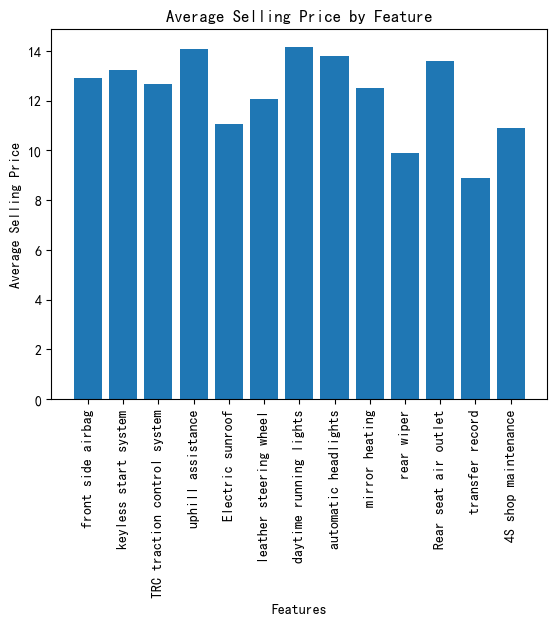

In [9]:
# Define the columns to plot and calculate the mean selling price for each
cols = ["front side airbag", "keyless start system", "TRC traction control system", 
        "uphill assistance", "Electric sunroof", "leather steering wheel", 
        "daytime running lights", "automatic headlights", "mirror heating", "rear wiper",
        "Rear seat air outlet", "transfer record", "4S shop maintenance"]

means = []
for col in cols:
    means.append(data[data[col] == 1]["selling price"].mean())

# Plot the bar chart
plt.bar(x=cols, height=means)

# Set the chart title and axis labels
plt.title("Average Selling Price by Feature")
plt.xlabel("Features")
plt.ylabel("Average Selling Price")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


In [10]:
cat_vars = data.select_dtypes(include=['object']).columns.tolist()



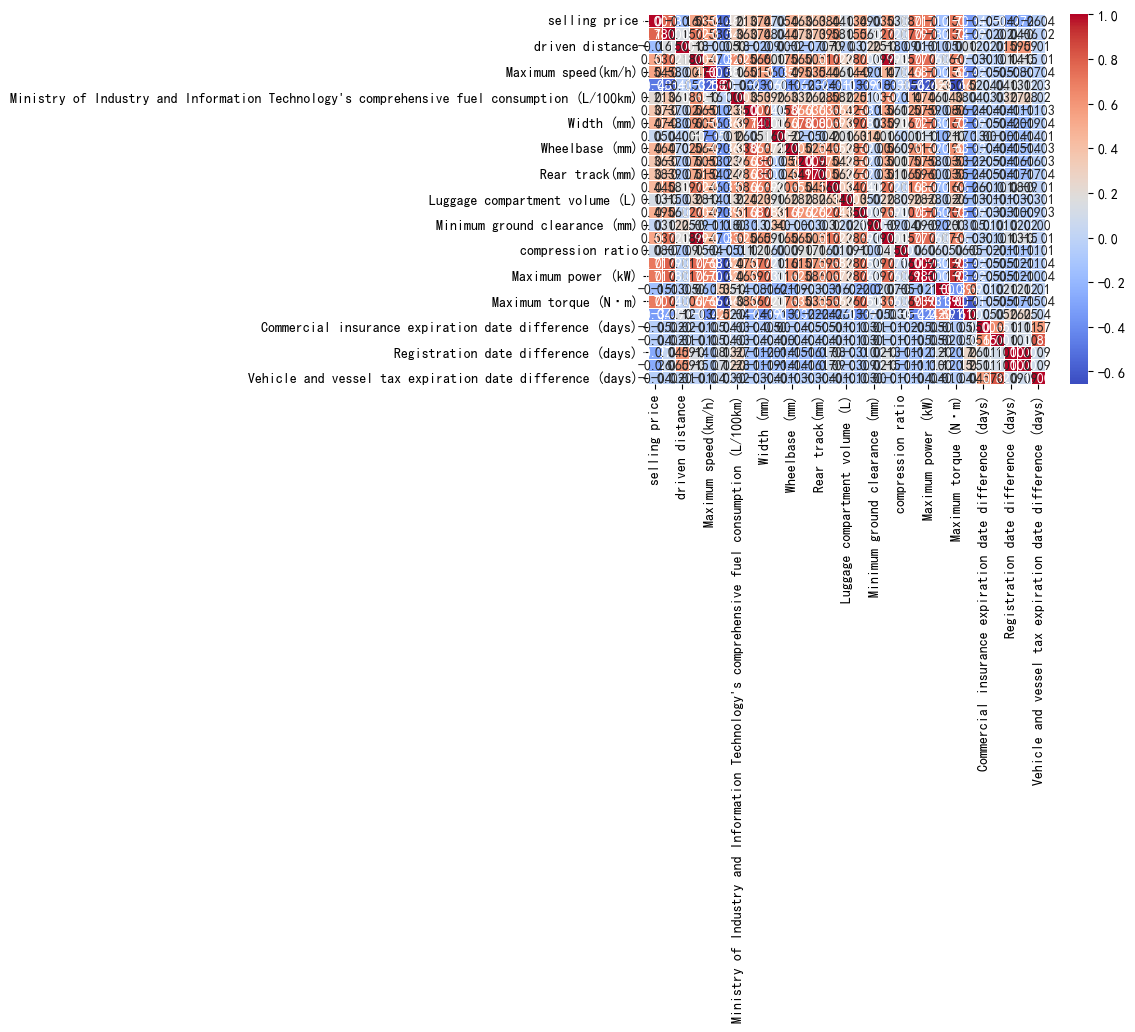

In [11]:
# Extract numeric variables
float_vars = data.select_dtypes(include=['float']).columns.tolist()

# Calculate the correlation coefficient matrix
corr_matrix = data[float_vars].corr()

# Draw a heat map of the correlation coefficient matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

# display graphics
plt. show()

In [12]:
import seaborn as sns
sns.pairplot(data, vars=float_vars)


# Column after removing 0-1 data and One-Hot data

In [ ]:
corr_cols = list(data.columns[:28]) + list(data.columns[43:49])

In [ ]:
test_data = data[corr_cols]

In [ ]:
test_data_corr = test_data.corr()

In [ ]:
price_corr = dict(test_data_corr.iloc[0])

In [ ]:
price_corr = sorted(price_corr.items(), key=lambda x: abs(x[1]), reverse=True)

In [ ]:
price_corr

[('selling price', 1.0),
 ('new car price', 0.783993530189982),
 ('Maximum power (kW)', 0.7117612690885329),
 ('Maximum horsepower (Ps)', 0.7110554212214745),
 ('Maximum torque (N·m)', 0.6969526314011952),
 ('Maximum speed(km/h)', 0.5419965777865438),
 ('Displacement (mL)', 0.5330405118742261),
 ('Displacement (L)', 0.5308107362791777),
 ('curb weight(kg)', 0.49194473580904985),
 ('Official 0-100km/h acceleration (s)', -0.4817654234231712),
 ('Width (mm)', 0.47143972758963365),
 ('Wheelbase (mm)', 0.4616675623002046),
 ('Number of cylinders (pieces)', 0.4454272911503952),
 ('Fuel tank capacity (L)', 0.43777768640979897),
 ('Rear track(mm)', 0.38050056092473983),
 ('Length (mm)', 0.3713764530322099),
 ('Front track(mm)', 0.36203819328712794),
 ('Maximum torque speed(rpm)', -0.3350318499882138),
 ('Registration date difference (days)', -0.2737947095245059),
 ('Factory date difference (days)', -0.2598892184068876),
 ("Ministry of Industry and Information Technology's comprehensive fuel co

In [ ]:
price_corr_cols = [ r[0] for r in price_corr ]

In [ ]:
price_data = test_data_corr[price_corr_cols].loc[price_corr_cols]

In [20]:
price_data.shape

(34, 34)

In [ ]:
#  Descriptive statistics on the dataset
price_data.describe()

,selling price,new car price,Maximum power (kW),Maximum horsepower (Ps),Maximum torque (N·m),Maximum speed(km/h),Displacement (mL),Displacement (L),curb weight(kg),Official 0-100km/h acceleration (s),Width (mm),Wheelbase (mm),Number of cylinders (pieces),Fuel tank capacity (L),Rear track(mm),Length (mm),Front track(mm),Maximum torque speed(rpm),Registration date difference (days),Factory date difference (days),Ministry of Industry and Information Technology's comprehensive fuel consumption (L/100km),driven distance,Maximum power speed(rpm),Luggage compartment volume (L),Number of valves per cylinder (pieces),compression ratio,Number of doors,height (mm),Commercial insurance expiration date difference (days),Compulsory traffic insurance expiration date difference (days),Vehicle and vessel tax expiration date difference (days),passenger/person,Minimum ground clearance (mm),number of seats
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.225309,0.290390,0.336432,0.334127,0.301664,0.207159,0.363832,0.365470,0.337519,-0.136682,0.311222,0.292465,0.273429,0.334153,0.270385,0.285569,0.266096,-0.055731,0.057951,0.062706,0.268928,0.092917,0.008190,0.159354,0.053004,0.062302,0.023769,0.117691,0.058144,0.065966,0.064535,0.098558,0.076804,0.149816
std,0.363086,0.368980,0.426247,0.427927,0.437556,0.383896,0.341876,0.342045,0.374903,0.345280,0.389676,0.353543,0.283473,0.341835,0.351223,0.354453,0.345510,0.329295,0.293544,0.291935,0.232867,0.231097,0.255528,0.214941,0.189092,0.185245,0.237766,0.247002,0.226141,0.245887,0.239794,0.236246,0.205932,0.224608
min,-0.481765,-0.541946,-0.615395,-0.616491,-0.656280,-0.580145,-0.327785,-0.324321,-0.393907,-0.656280,-0.393632,-0.362740,-0.337181,-0.311248,-0.241344,-0.319911,-0.225078,-0.607077,-0.273795,-0.259889,-0.112124,-0.158378,-0.386259,-0.133541,-0.170542,-0.113994,-0.319911,-0.352401,-0.053871,-0.051761,-0.043655,-0.229114,-0.201368,-0.092184
25%,-0.042726,0.001582,-0.028155,-0.031863,-0.013205,-0.075350,0.075126,0.070483,0.020286,-0.350709,-0.041304,-0.026450,0.069554,0.031170,-0.041298,-0.036768,-0.043794,-0.285457,-0.119609,-0.113857,0.075442,-0.025195,-0.143670,-0.011777,-0.022228,-0.015540,-0.079743,-0.009966,-0.043905,-0.038862,-0.032694,-0.026061,-0.000055,-0.002477
50%,0.170778,0.256488,0.368600,0.374123,0.317649,0.157927,0.373292,0.371324,0.392949,-0.155820,0.349107,0.341199,0.228570,0.387422,0.257200,0.331515,0.248943,-0.026075,-0.027530,-0.028958,0.263064,0.014507,-0.034840,0.146512,0.026649,0.050827,-0.053235,0.070493,-0.010259,-0.008594,-0.007305,0.029934,0.029498,0.101146
75%,0.486818,0.578011,0.708710,0.704273,0.664295,0.521307,0.654106,0.657672,0.688379,0.040475,0.682886,0.561057,0.442538,0.657551,0.544586,0.566471,0.527681,0.044455,0.130355,0.123547,0.383406,0.169275,0.069414,0.275968,0.090791,0.094757,0.026626,0.190250,0.020239,0.015772,0.012670,0.104357,0.107670,0.192764
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


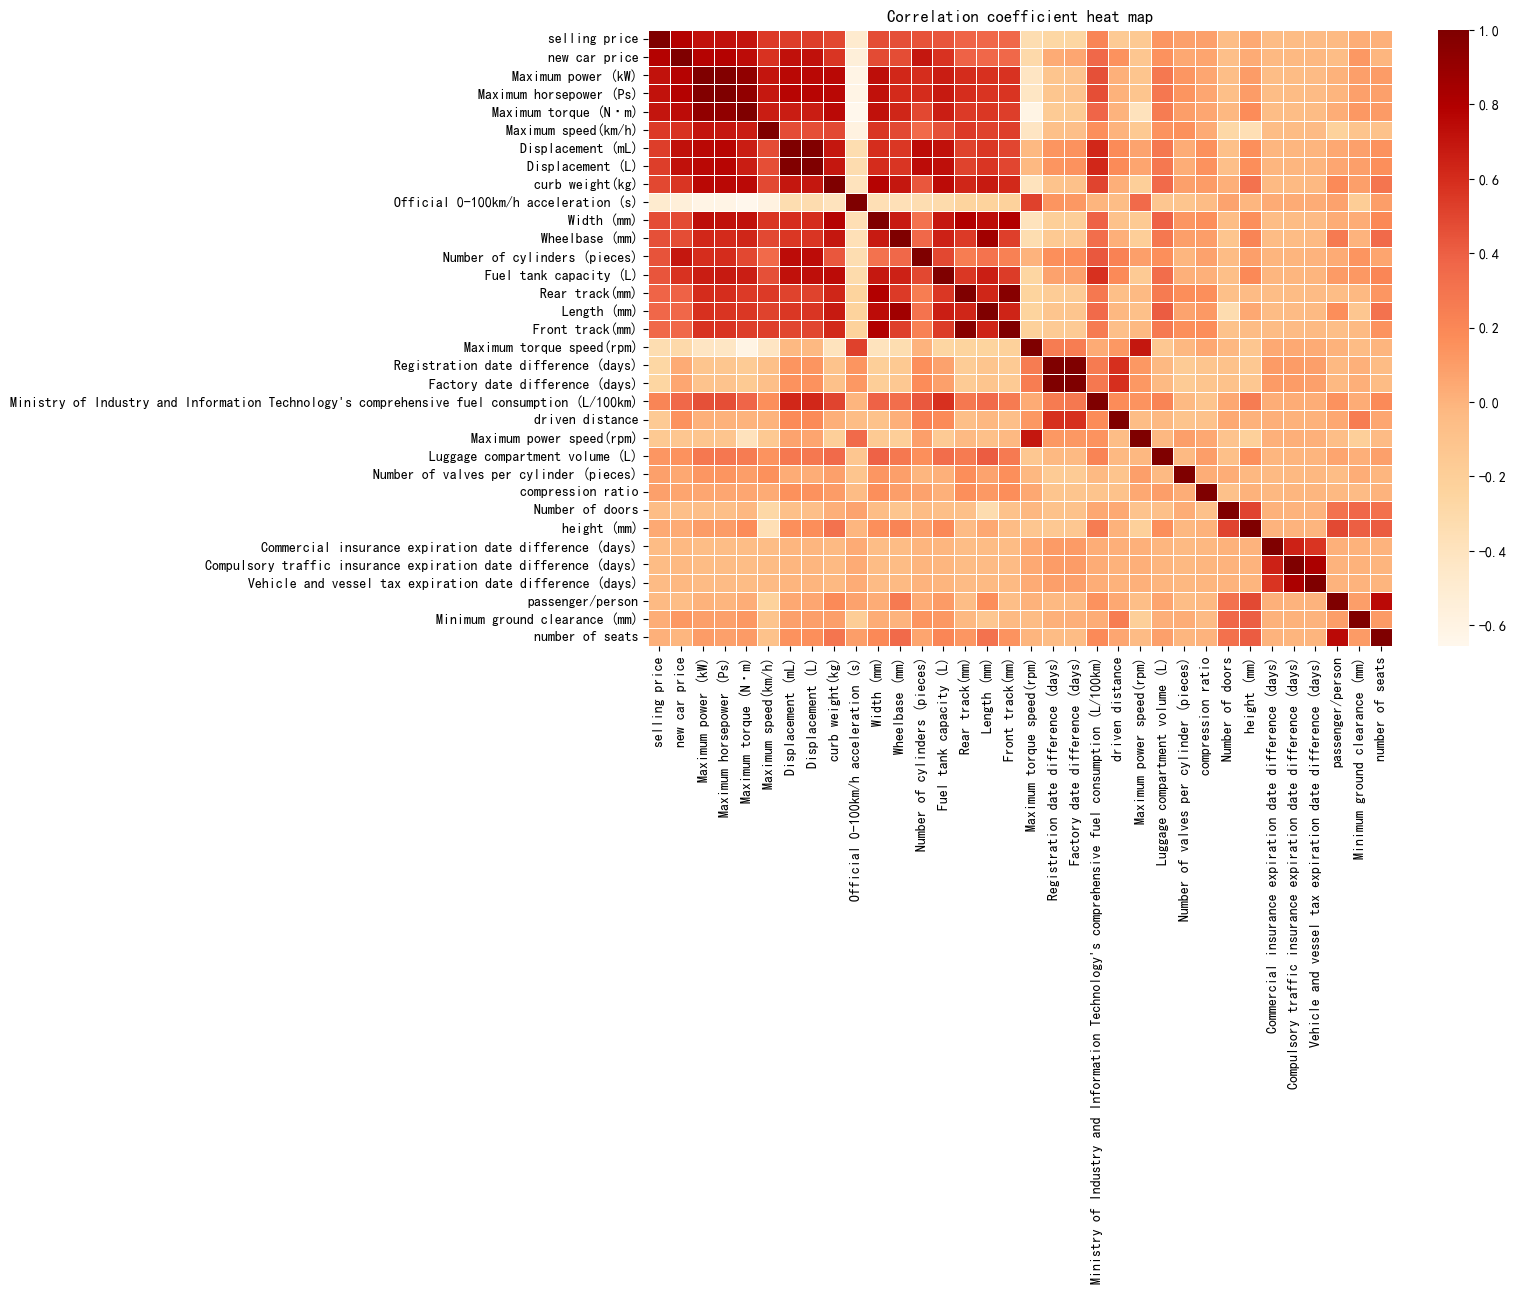

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Correlation coefficient heat map")
ax = sns.heatmap(price_data, linewidths=0.5, cmap='OrRd', cbar=True)
plt.show()

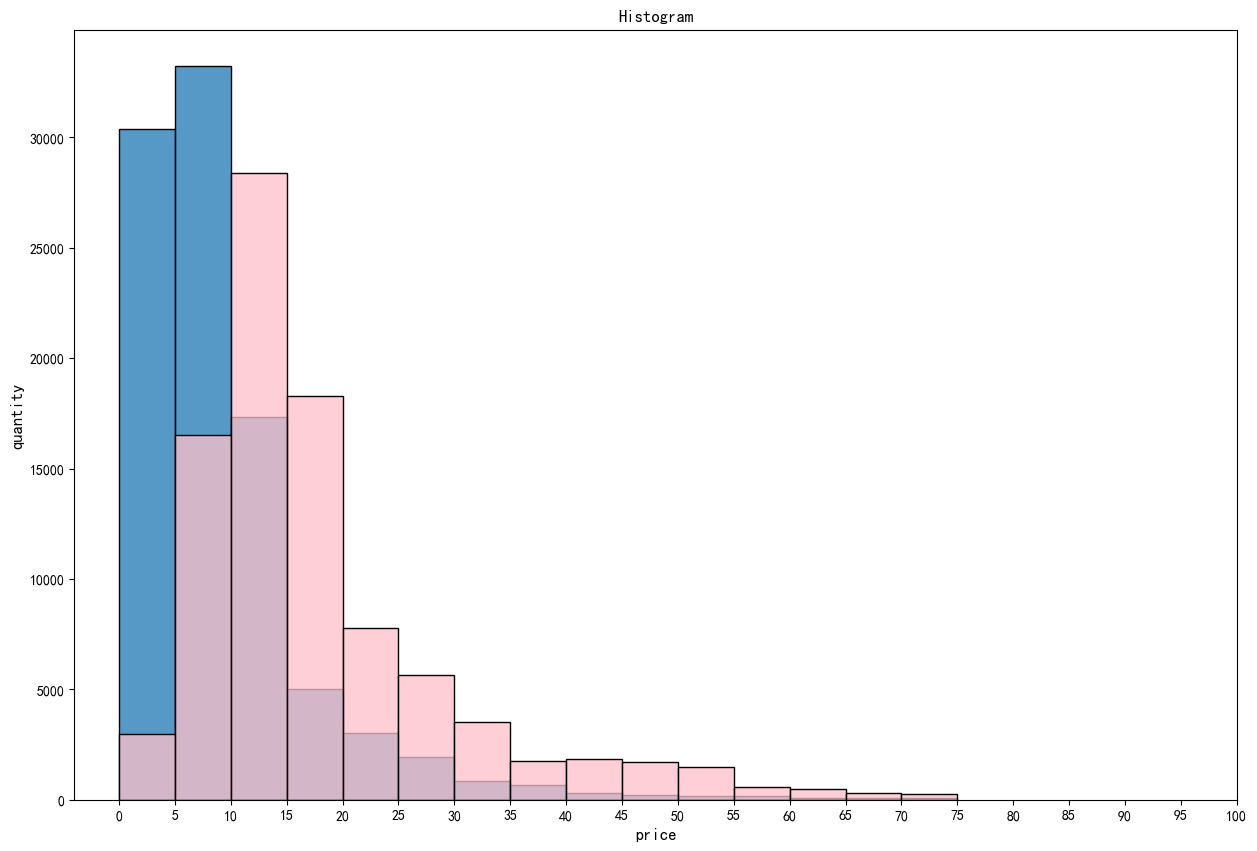

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Histogram")
sns.histplot(test_data['selling price'], bins = np.arange(0,80,5))
sns.histplot(test_data['new car price'], bins = np.arange(0,80,5), color="pink")
plt. xlim(-4,100)
x_major_locator=MultipleLocator(5)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.xlabel("price", fontdict={"size":12})
plt.ylabel("quantity", fontdict={"size":12})
plt. show()

# Split data

In [24]:
X = data[ data.columns[1:] ]
y_reg = data[ data.columns[0] ]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((65616, 189), (28122, 189), (65616,), (28122,))

In [27]:
# Check the number of effective samples
n_samples = len(data.index)
print("Number of valid samples:", n_samples)

# View the number of independent and dependent variables for each sample
n_features = len(data.columns) - 1 # because the last column is the dependent variable
n_targets = 1 # Assume there is only one dependent variable
print("Number of independent variables per sample:", n_features)
print("Number of dependent variables per sample:", n_targets)

Number of valid samples: 93738
Number of independent variables per sample: 189
Number of dependent variables per sample: 1


# Evaluation indicator function definition

In [28]:
def evaluation(model):
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test, ypred)
    mse = mean_squared_error(y_test, ypred)
    rmse = sqrt(mse)
    print("MAE: %.2f" % mae)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % rmse)
    return ypred

# linear regression model 

In [29]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
print("params: ", model_LR.get_params())
print("train score: ", model_LR.score(x_train, y_train))
print("test score: ", model_LR.score(x_test, y_test))
predict_y = evaluation(model_LR)

params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
train score:  0.8235877009628059
test score:  0.7654427047192143
MAE: 1.97
MSE: 25.90
RMSE: 5.09


In [30]:
test_y = np.array(y_test)

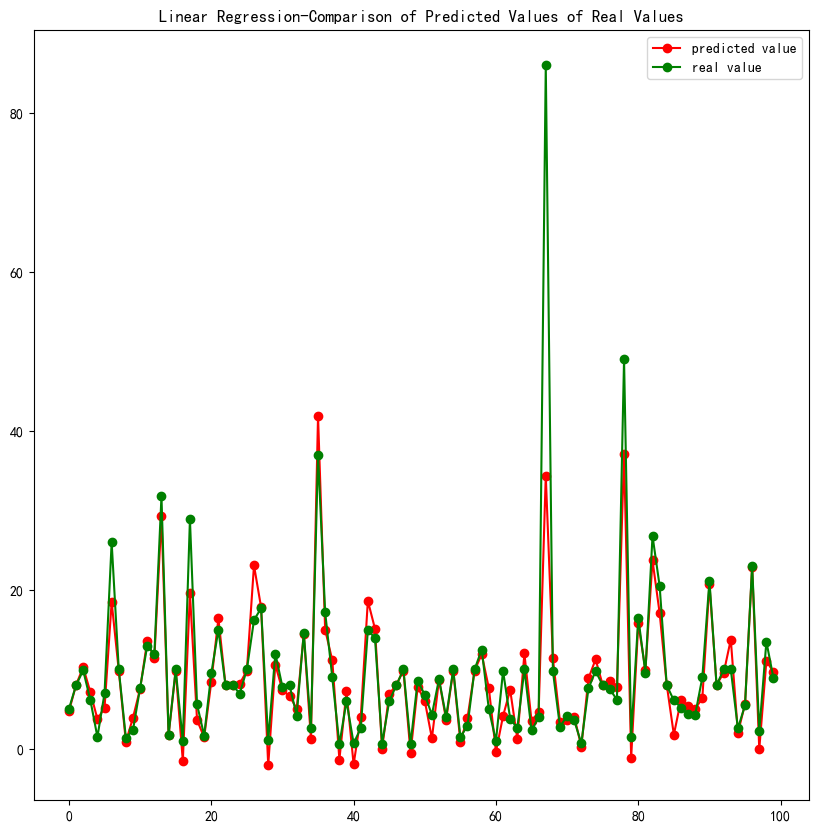

In [31]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('Linear Regression-Comparison of Predicted Values of Real Values')
plt.plot(predict_y[:100], 'ro-', label='predicted value')
plt.plot(test_y[:100], 'go-', label='real value')
plt. legend()
plt. show()

In [32]:
import pandas as pd

# Create a table of the first 50 predicted values and real values
df = pd.DataFrame({'Predicted values': predict_y[:50], 'Real values': test_y[:50]})
print(df)


    Predicted values  Real values
0           4.738622         5.04
1           8.053520         8.00
2          10.279984         9.88
3           7.162063         6.18
4           3.755380         1.50
5           5.151580         7.00
6          18.487080        26.00
7           9.860625        10.00
8           0.884489         1.38
9           3.933721         2.38
10          7.552939         7.68
11         13.577745        13.00
12         11.374498        11.90
13         29.289513        31.79
14          1.703452         1.80
15          9.860625        10.00
16         -1.519278         0.99
17         19.556057        28.90
18          3.630498         5.60
19          1.449610         1.68
20          8.434528         9.50
21         16.424825        14.98
22          8.053520         8.00
23          8.053520         8.00
24          8.198205         6.96
25          9.860625        10.00
26         23.090600        16.20
27         17.819382        17.70
28         -2.

# KNN

In [33]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train, y_train)
print("params: ", model_knn.get_params())
print("train score: ", model_knn.score(x_train, y_train))
print("test score: ", model_knn.score(x_test, y_test))
predict_y = evaluation(model_knn)

params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
train score:  0.8701965731045325
test score:  0.7886917797846165
MAE: 1.35
MSE: 23.33
RMSE: 4.83


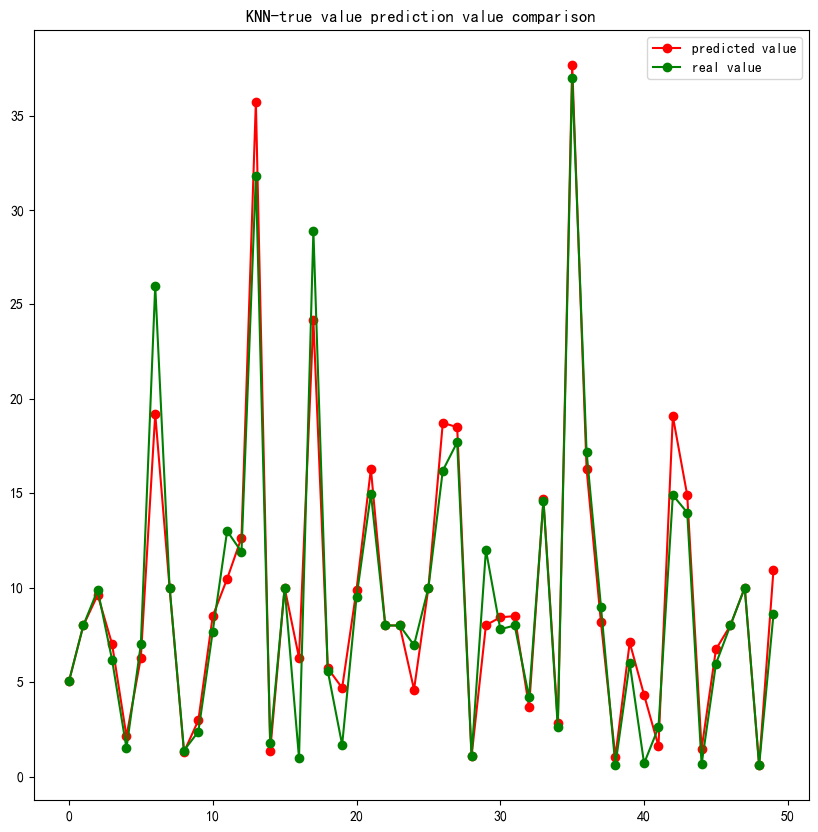

In [34]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('KNN-true value prediction value comparison')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

In [35]:
import numpy as np
import pandas as pd

# Create a 2D array of predicted and real values for the first 50 samples
data = np.column_stack((predict_y[:50], test_y[:50]))

# Convert the 2D array into a Pandas DataFrame
df = pd.DataFrame(data, columns=['Predicted values', 'Real values'])

# Display the DataFrame
print(df)


    Predicted values  Real values
0              5.040         5.04
1              8.000         8.00
2              9.616         9.88
3              7.016         6.18
4              2.130         1.50
5              6.296         7.00
6             19.200        26.00
7             10.000        10.00
8              1.300         1.38
9              2.980         2.38
10             8.500         7.68
11            10.468        13.00
12            12.652        11.90
13            35.736        31.79
14             1.376         1.80
15            10.000        10.00
16             6.296         0.99
17            24.180        28.90
18             5.738         5.60
19             4.692         1.68
20             9.896         9.50
21            16.290        14.98
22             8.000         8.00
23             8.000         8.00
24             4.606         6.96
25            10.000        10.00
26            18.728        16.20
27            18.500        17.70
28            

# Decision tree regression  

In [36]:
model_dtr = DecisionTreeRegressor(max_depth = 5, random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 30, 'splitter': 'best'}
train score:  0.8421774667649017
test score:  0.7833910010986487
MAE: 2.09
MSE: 23.92
RMSE: 4.89


In [37]:
model_dtr.get_depth()

5

In [38]:
model_dtr = DecisionTreeRegressor( random_state=30)
model_dtr.fit(x_train, y_train)
print("params: ", model_dtr.get_params())
print("train score: ", model_dtr.score(x_train, y_train))
print("test score: ", model_dtr.score(x_test, y_test))
predict_y = evaluation(model_dtr)

params:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 30, 'splitter': 'best'}
train score:  0.9999992255299539
test score:  0.8625102066709914
MAE: 1.17
MSE: 15.18
RMSE: 3.90


In [39]:
model_dtr.get_depth()

38

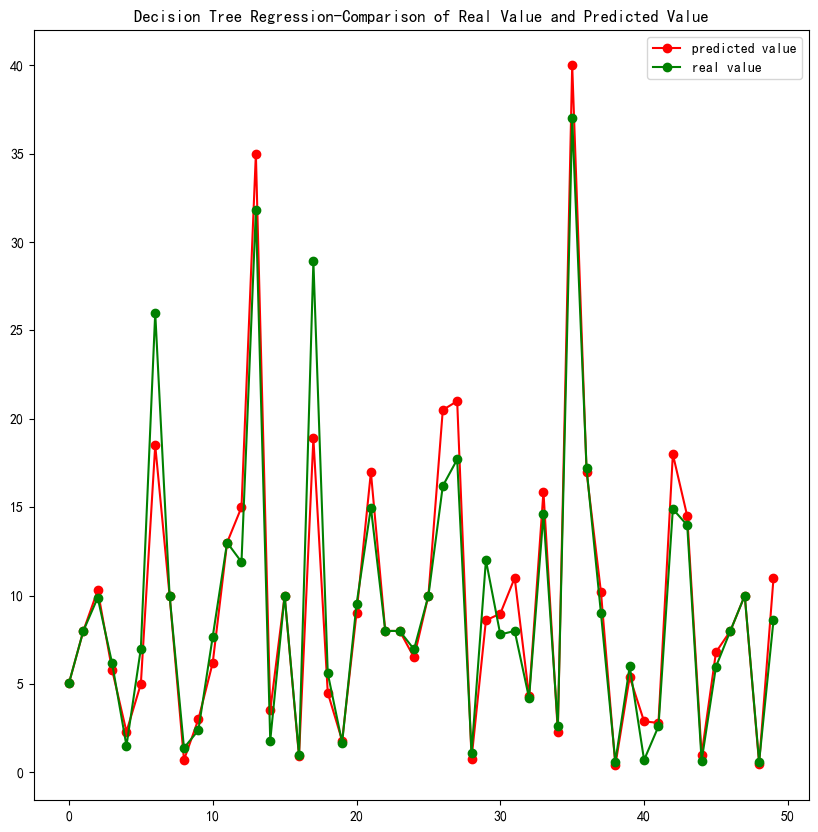

In [40]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('Decision Tree Regression-Comparison of Real Value and Predicted Value')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

# Random Forest

In [41]:
model_rfr = RandomForestRegressor(random_state=30)
model_rfr.fit(x_train, y_train)
print("params: ", model_rfr.get_params())
print("train score: ", model_rfr.score(x_train, y_train))
print("test score: ", model_rfr.score(x_test, y_test))
predict_y = evaluation(model_rfr)

params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.986342838678056
test score:  0.9097389620935806
MAE: 0.83
MSE: 9.97
RMSE: 3.16


In [42]:
feature_important = sorted(
    zip(x_train.columns, map(lambda x:round(x,4), model_rfr.feature_importances_)),
    key=lambda x: x[1],reverse=True)

for i in range(33):
    print(feature_important[i])

('new car price', 0.5557)
('Registration date difference (days)', 0.0742)
('Maximum horsepower (Ps)', 0.0584)
('Maximum torque (N·m)', 0.0568)
('Maximum power (kW)', 0.0542)
('driven distance', 0.0389)
('Factory date difference (days)', 0.0222)
('Wheelbase (mm)', 0.0114)
('Displacement (L)', 0.0093)
('Maximum speed(km/h)', 0.0087)
('Width (mm)', 0.0082)
('Parking Brake Type_Handbrake', 0.0082)
('Displacement (mL)', 0.0077)
('Length (mm)', 0.0062)
('height (mm)', 0.0059)
('curb weight(kg)', 0.0052)
("Ministry of Industry and Information Technology's comprehensive fuel consumption (L/100km)", 0.0051)
('Maximum torque speed(rpm)', 0.005)
('Luggage compartment volume (L)', 0.0049)
('Rear track(mm)', 0.0036)
('Fuel tank capacity (L)', 0.0036)
('Official 0-100km/h acceleration (s)', 0.003)
('Front track(mm)', 0.003)
('Power assist type_Electric power assist', 0.0029)
('compression ratio', 0.0022)
('Maximum power speed(rpm)', 0.0022)
('daytime running lights', 0.0019)
('Number of gears_5', 0.

In [43]:
f1_list = []
f2_list = []

for i in range(33):
     f1_list.append(feature_important[i][0])

for i in range(1, 34):
     f2_list.append(price_corr[i][0])
    
cnt = 0
for i in range(33):
     if f1_list[i] in f2_list:
         print(f1_list[i])
         cnt += 1
print("Total"+str(cnt)+"repeated features!")

new car price
Registration date difference (days)
Maximum horsepower (Ps)
Maximum torque (N·m)
Maximum power (kW)
driven distance
Factory date difference (days)
Wheelbase (mm)
Displacement (L)
Maximum speed(km/h)
Width (mm)
Displacement (mL)
Length (mm)
height (mm)
curb weight(kg)
Ministry of Industry and Information Technology's comprehensive fuel consumption (L/100km)
Maximum torque speed(rpm)
Luggage compartment volume (L)
Rear track(mm)
Fuel tank capacity (L)
Official 0-100km/h acceleration (s)
Front track(mm)
compression ratio
Maximum power speed(rpm)
Commercial insurance expiration date difference (days)
Minimum ground clearance (mm)
Total26repeated features!


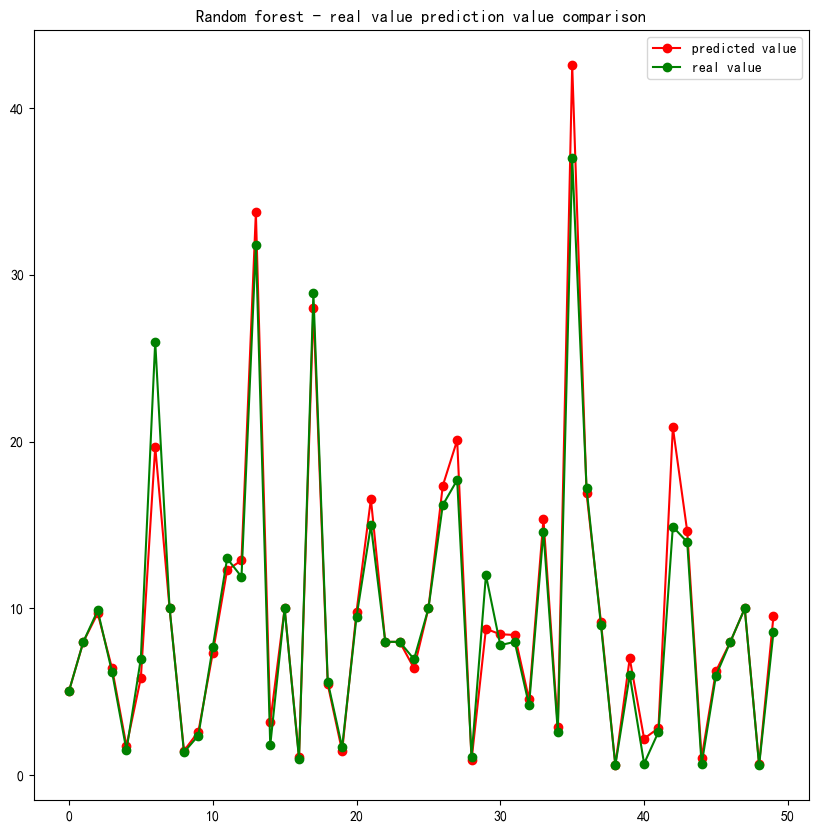

In [44]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('Random forest - real value prediction value comparison')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

# Adaboost

In [45]:
model_abr = AdaBoostRegressor()
model_abr.fit(x_train, y_train)
print("params: ", model_abr.get_params())
print("train score: ", model_abr.score(x_train, y_train))
print("test score: ", model_abr.score(x_test, y_test))
predict_y = evaluation(model_abr)

params:  {'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}
train score:  0.38304400732245736
test score:  0.38070476627207805
MAE: 6.85
MSE: 68.38
RMSE: 8.27


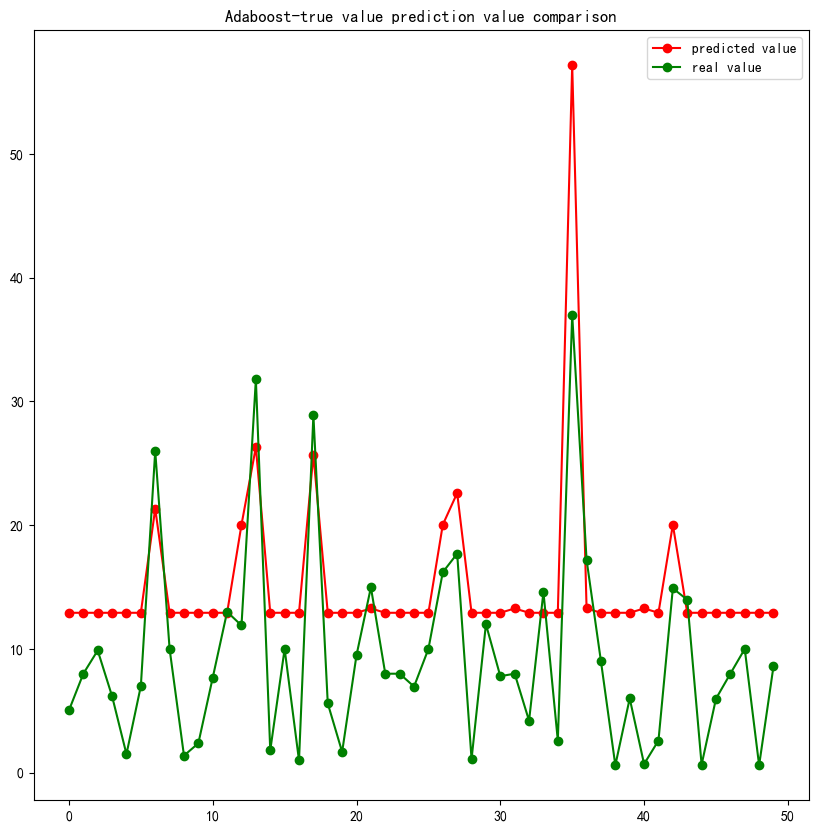

In [46]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('Adaboost-true value prediction value comparison')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

# Bagging

In [47]:
model_br = BaggingRegressor(random_state=30)
model_br.fit(x_train, y_train)
print("params: ", model_br.get_params())
print("train score: ", model_br.score(x_train, y_train))
print("test score: ", model_br.score(x_test, y_test))
predict_y = evaluation(model_br)

params:  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 30, 'verbose': 0, 'warm_start': False}
train score:  0.9872106115151874
test score:  0.8942665601075576
MAE: 0.88
MSE: 11.67
RMSE: 3.42


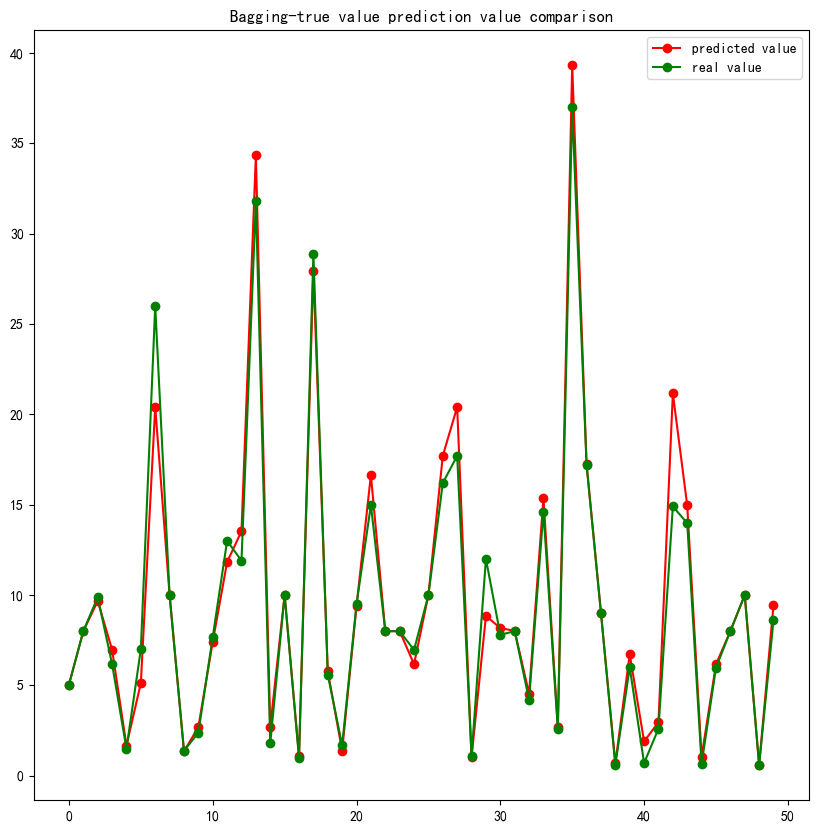

In [48]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('Bagging-true value prediction value comparison')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

# LGBM

In [49]:
model_lgb = lgb.LGBMRegressor(num_leaves=40, max_depth=5, random_state=42)
model_lgb.fit(x_train, y_train)
print("params: ", model_lgb.get_params())
print("train score: ", model_lgb.score(x_train, y_train))
print("test score: ", model_lgb.score(x_test, y_test))
predict_y = evaluation(model_lgb)

params:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 40, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
train score:  0.9223970412730735
test score:  0.881389118696777
MAE: 1.22
MSE: 13.10
RMSE: 3.62


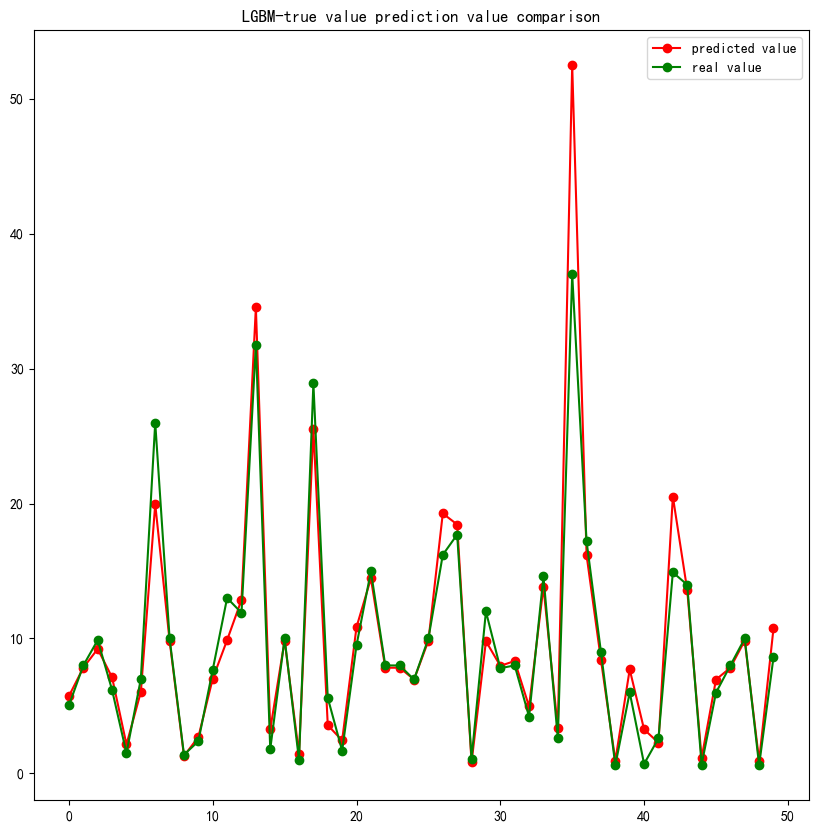

In [50]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('LGBM-true value prediction value comparison')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

# XGBR

In [51]:
model_xgbr = XGBRegressor(n_estimators = 200, max_depth=5, random_state=1024)
model_xgbr.fit(x_train, y_train)
print("params: ", model_xgbr.get_params())
print("train score: ", model_xgbr.score(x_train, y_train))
print("test score: ", model_xgbr.score(x_test, y_test))
predict_y = evaluation(model_xgbr)

params:  {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 1024, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
train score:  0.9897272944798133
test score:  0.8923618496696918
MAE: 0.88
MSE: 11.88
RMSE: 3.45


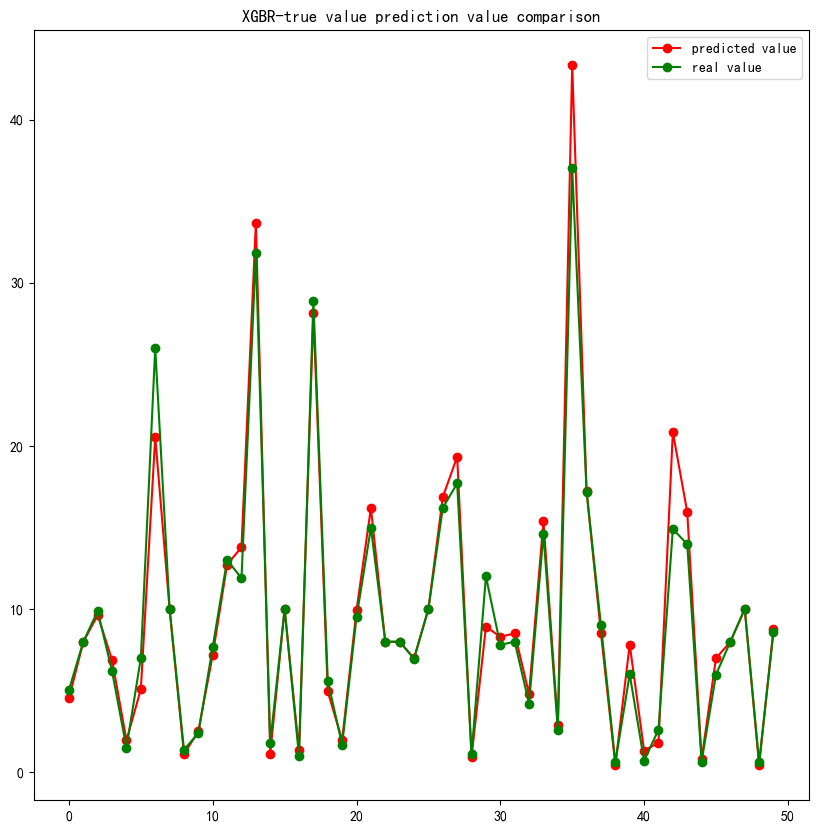

In [52]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('XGBR-true value prediction value comparison')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

# voting

In [53]:
model_voting = VotingRegressor(estimators=[('model_LR', model_LR), 
                                           ('model_knn', model_knn), 
                                                ('model_dtr', model_dtr),
                                            ])
model_voting.fit(x_train, y_train)
# print("params: ", model_voting.get_params())
print("train score: ", model_voting.score(x_train, y_train))
print("test score: ", model_voting.score(x_test, y_test))
predict_y = evaluation(model_voting)

train score:  0.9496864574717221
test score:  0.8739561845610109
MAE: 1.14
MSE: 13.92
RMSE: 3.73


In [54]:
model_voting = VotingRegressor(estimators=[('model_LR', model_LR), 
                                           ('model_knn', model_knn), 
                                                ('model_dtr', model_dtr),
                                                ('model_rfr', model_rfr),
                                                ('model_xgbr', model_xgbr)
                                            ])
model_voting.fit(x_train, y_train)
# print("params: ", model_voting.get_params())
print("train score: ", model_voting.score(x_train, y_train))
print("test score: ", model_voting.score(x_test, y_test))
predict_y = evaluation(model_voting)

train score:  0.9745105932884348
test score:  0.9042350845271909
MAE: 0.94
MSE: 10.57
RMSE: 3.25


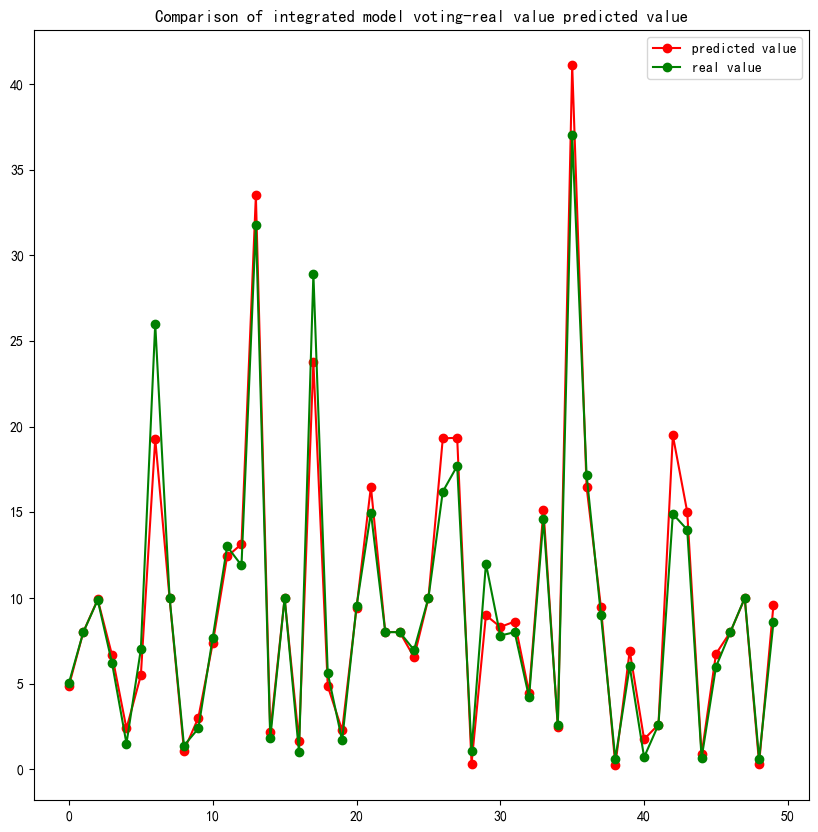

In [55]:
plt.figure(figsize=(10,10))
# Predictive value
plt.title('Comparison of integrated model voting-real value predicted value')
plt.plot(predict_y[:50], 'ro-', label='predicted value')
plt.plot(test_y[:50], 'go-', label='real value')
plt. legend()
plt. show()

In [ ]:
model_voting = VotingRegressor(estimators=[
    ('model_LR', model_LR), 
    ('model_knn', model_knn), 
    ('model_dtr', model_dtr),
    ('model_rfr', model_rfr),
    ('model_xgbr', model_xgbr)
])

model_voting.fit(x_train, y_train)

# Retrieve the estimators and their weights
estimators = model_voting.estimators_
weights = model_voting.weights_

# Determine the contribution of each model
model_contributions = {}
for estimator, weight in zip(estimators, weights):
    model_name = estimator[0]
    model_contribution = weight / sum(weights)
    model_contributions[model_name] = model_contribution

# Sort the model contributions in descending order
sorted_contributions = sorted(model_contributions.items(), key=lambda x: x[1], reverse=True)

# Print the model contributions
for model, contribution in sorted_contributions:
    print(f"Model: {model}, Contribution: {contribution}")
